# APIs, Databases, and Web Scraping

In this lab we will be working with Python. Thus all the functions and calls that we have learned thus far will not work out right. One of the benefits of using Jupyter notebook is that we can use magics. Magics allow us to call other programming languages to run commands. 


## Using R and Python Together

Since this notebook has a Python kernel we will need to use Python commands. Any of the commands we learned in R will not work (unless we work some "magic"). The first thing we will need to do is install and load some libraries. 

### A Note to RStudio Users

A lot of the beginning of this lab will not apply to you if you are using RStudio. Rstudio does not make use of magics. Instead, you will want to use the R library `reticulate` (https://rstudio.github.io/reticulate/). This library will give you the ability to create cells that will run Python code. You do this by using

```
```{python}
PYTHON CODE HERE
`` `

```

You will still need to make sure that you have all the necessary libraries in Python to use the code in this lab. Please reach out to me individually if you need any help at all navigating reticulate and Python.

### Necessary Packages

Unlike R, installing Python libraries is not as easy as just typing commands into Jupyter notebook. This is because the Jupyter kernel's are disconnected from the Jupyter shell. We have two options 

1. Open up a terminal or powershell and use `pip` to install the libraries
2. Open up a `conda` terminal and use the `conda` installation commands in the terminal
3. Use the Python package `sys` to run installation commands in Jupyter

In this lab I will use the third option. So the first things I need to do is load the `sys` library.

In [87]:
import sys

The `sys` library help Python run system commands from Python. Be very careful using the package. Any functions or libraries that make use of this package should be used with a healthy dose of scepticism. We will only be using this package to download libraries. 

The following libraries will be useful

- `rpy2`
    - This package will allow you to use R code in a Jupyter notebook.
- `pandas`
    - This packages contains functions that allow Python to use data frames and do statistical analysis.
- `numpy`
    - This package contains mathematical functions and algorithms.
- `matplotlib`
    - This packages contains functions for plotting and graphing in Python.


In [88]:
!conda install --yes --prefix {sys.prefix} rpy2
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - rpy2 -> python[version='2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|3.4.*|3.3.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python 

It looks like I might have gotten some errors and some of the packages may not have installed. In order to check that the packages are installed I can use the command `!conda list [PACKAGE NAME]`. This lists all of the packages available and then searches them for the pacakge name. If nothing shows up then the package is missing.

In [89]:
!conda list rpy2
!conda list pandas
!conda list numpy
!conda list matplotlib

# packages in environment at /Users/stewaral/opt/anaconda3:
#
# Name                    Version                   Build  Channel
rpy2                      3.4.2                    pypi_0    pypi
# packages in environment at /Users/stewaral/opt/anaconda3:
#
# Name                    Version                   Build  Channel
pandas                    1.2.1            py38hb2f4e1b_0  
# packages in environment at /Users/stewaral/opt/anaconda3:
#
# Name                    Version                   Build  Channel
numpy                     1.18.5           py38h1da2735_0  
numpy-base                1.18.5           py38h3304bdc_0  
numpydoc                  1.1.0                      py_0  
# packages in environment at /Users/stewaral/opt/anaconda3:
#
# Name                    Version                   Build  Channel
matplotlib                3.2.2                         0  
matplotlib-base           3.2.2            py38h5670ca0_0  


I could also have used syntax that we have used in the filter function

In [90]:
!conda list "rpy2|pandas|numpy|matplotlib"

# packages in environment at /Users/stewaral/opt/anaconda3:
#
# Name                    Version                   Build  Channel
matplotlib                3.2.2                         0  
matplotlib-base           3.2.2            py38h5670ca0_0  
numpy                     1.18.5           py38h1da2735_0  
numpy-base                1.18.5           py38h3304bdc_0  
numpydoc                  1.1.0                      py_0  
pandas                    1.2.1            py38hb2f4e1b_0  
rpy2                      3.4.2                    pypi_0    pypi


It looks like we have everything we need installed. Now we just need to load these libraries.

In [92]:
import rpy2.rinterface
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext rpy2.ipython

### Magics

#### What are Magics?
Magics are commands that are particular to Jupyter and IPython notebooks. They allow you to use commands from other programming languages, capture the output, and then present in a notebook. I have actually already used something similar to magics in this notebook. When we did the command `!conda` we were using a system shell magic. The `!` called the `system()` function of Python and then ran a conda terminal. Depending on whether you are using Windows or Mac, the potential commands will be different. This is because Mac uses BASH terminal and Windows uses powershell.  

Just to test this out. I am using a Mac and so I will do the simple unix command `ls`. The `ls` command will list all files in a selected directory. (Note if you are using windows the `ls` command is not part of powershell. You should try `!dir` instead.)

In [92]:
!ls 

APIs, Databases, and Web Scraping.ipynb
APIs, Databases, and Web Scraping.ipynb.invalid
AnnualEmployeeSalary.csv
LAB 1(Histograms) Notes.ipynb
LAB 2(Distributions) Notes.html
LAB 2(Distributions) Notes.ipynb
LAB 3(Plots and Graphs) Notes.ipynb
LAB 4 (Correlation and Regression).ipynb
LAB0
LAB1
LAB3img1.png
LAB3img10.png
LAB3img11.png
LAB3img12.png
LAB3img13.png
LAB3img14.png
LAB3img15.png
LAB3img16.png
LAB3img17.png
LAB3img18.png
LAB3img19.png
LAB3img2.png
LAB3img20.png
LAB3img21.png
LAB3img22.png
LAB3img23.png
LAB3img24.png
LAB3img3.png
LAB3img4.png
LAB3img5.png
LAB3img6.png
LAB3img7.png
LAB3img8.png
LAB3img9.png
LAB4img1.png
LAB4img10.png
LAB4img2.png
LAB4img3.png
LAB4img4.png
LAB4img5.png
LAB4img6.png
LAB4img7.png
LAB4img8.png
LAB4img9.png
LAB5img1.png
LAB5img2.png
LAB5img3.png
Lab 0 (Introduction to R) Notes.ipynb
Lab 0 (Introduction to R).html
Lab0Meme.jpg
Lab1img1.png
Lab1img2.png
Lab1img3.png
Lab1img4.png
Lab1img5.png
Lab2img1.png
SPOTIPY_CLIENT.txt
SPOTIPY_SECRET.txt
gov_apikey

As we can see, this directory for me contains all of the lab files for the class. 

#### Possible Magics
So we can use magics to run BASH commands, but there is a lot more we can do. To see the full list of magics you can run `%lsmagic`

In [93]:
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%lat

As you can see there are a lot of different magics. Some of them are just functions that you can run on a single line. For instance, notice that `%ls` is a magic. This means that even Windows machines can run the `ls` function using a magic.

In [94]:
%ls

APIs, Databases, and Web Scraping.ipynb
APIs, Databases, and Web Scraping.ipynb.invalid
AnnualEmployeeSalary.csv
LAB 1(Histograms) Notes.ipynb
LAB 2(Distributions) Notes.html
LAB 2(Distributions) Notes.ipynb
LAB 3(Plots and Graphs) Notes.ipynb
LAB 4 (Correlation and Regression).ipynb
LAB0/
LAB1/
LAB3img1.png
LAB3img10.png
LAB3img11.png
LAB3img12.png
LAB3img13.png
LAB3img14.png
LAB3img15.png
LAB3img16.png
LAB3img17.png
LAB3img18.png
LAB3img19.png
LAB3img2.png
LAB3img20.png
LAB3img21.png
LAB3img22.png
LAB3img23.png
LAB3img24.png
LAB3img3.png
LAB3img4.png
LAB3img5.png
LAB3img6.png
LAB3img7.png
LAB3img8.png
LAB3img9.png
LAB4img1.png
LAB4img10.png
LAB4img2.png
LAB4img3.png
LAB4img4.png
LAB4img5.png
LAB4img6.png
LAB4img7.png
LAB4img8.png
LAB4img9.png
LAB5img1.png
LAB5img2.png
LAB5img3.png
Lab 0 (Introduction to R) Notes.ipynb
Lab 0 (Introduction to R).html
Lab0Meme.jpg
Lab1img1.png
Lab1img2.png
Lab1img3.png
Lab1img4.png
Lab1img5.png
Lab2img1.png
SPOTIPY_CLIENT.txt
SPOTIPY_SECRET.txt
gov_apik

The cell magics are programming languages that you can run in a cell of Jupyter notebook. If you do not see `%%R` in the list then you need to double check your rpy2 package. The R magic is not default in Jupyter notebook and you will need to run the following commands to upload it into your Python notebook.

```
import rpy2.rinterface
%load_ext rpy2.ipython
```

I already did this above in my notebook.

So we can run code from the following languages in a jupyter notebook

- !, (This is system code; BASH on mac, powershell on windows)  
- HTML  
- R
- javascript
- latex
- markdown 
- perl
- ruby

and more. If there is a language here that isn't listed then you can see if someone has written an notebook extension for the language in question. This is what the `rpy2` library does. Since R is not a default magic, a developer wrote a python library to make it so.

### Using the R Magic

Now we get to use the R magic and get Python and R to interact with one another. At the top of every cell that I want to run R code in I will put `%%R`. This tells Jupyter that I am going to run R code. The first thing I would want to do is load `tidyverse`.

In [95]:
%%R
library(tidyverse)

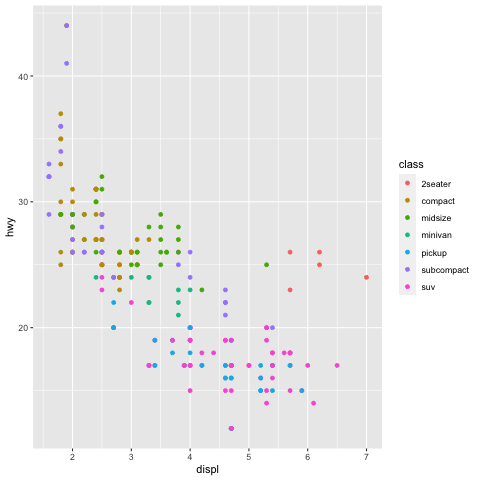

In [96]:
%%R
ggplot(mpg,aes(x=displ,y=hwy))+geom_point(aes(color=class))

This is a plot from LAB 3. So what I have done is successfully run a piece of R code in a Python notebook. This is useful to a point, but the real power comes from the possibility of passing values and variables to and from Python. 

#### Going from R to Python

There are multiple ways to get from R to Python. This first is using the `-o` command. This will output a list of variables that you define in the R cell into Python. 

In [97]:
%%R -o mpg_data

mpg_data<-mpg

The `mpg` dataset from tidyverse in now in Python with the variable `mpg_data`

In [98]:
mpg_data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


If we look at the type of this variable, we will see that it is a pandas dataframe. This is one important reason to load the `pandas` library into your notebook.

In [99]:
type(mpg_data)

pandas.core.frame.DataFrame

Another way to go from R to python is to use the `%Rget` magic. You can use this command in a python cell and it will retrieve an R variable from R

In [100]:
%%R
normal_vector <- rnorm(100)
normal_vector

  [1]  0.585385227 -0.705659567 -0.648798187  1.571860260  0.957780091
  [6]  0.098449584  1.803818569  0.895610186 -1.324331090  0.899490366
 [11] -0.027267851 -0.182476113  0.478921633  1.405367983  2.154289606
 [16] -0.313730269  0.398493861 -0.251250117  0.999767234  1.548556528
 [21]  0.882456317 -0.088815287  0.751694190 -0.824094364  1.341497532
 [26] -0.354017906  0.589587958 -1.457905118  0.836022813  0.347830803
 [31]  1.084962504  0.145268183  0.286702203 -0.665201971  1.330909559
 [36] -1.156531872  0.132962209  0.474814824 -0.372011509 -0.465149173
 [41] -0.344732883 -0.290742097 -1.359818886  0.415238006 -0.600287122
 [46]  0.163352557 -0.270156274  0.064166536  0.392725534 -0.356909909
 [51] -1.427888337 -0.432552768 -1.133540670  0.733042229 -0.379356595
 [56]  1.748536226 -0.149734017 -0.532544117  0.828872677  0.272619382
 [61] -0.244563186  0.953272702  0.900239152 -1.238571975  0.595239449
 [66]  0.849743366  0.432303577 -0.085017409 -1.533964377 -0.448993471
 [71] 

In [101]:
normal_vector_py= %Rget normal_vector
normal_vector_py

array([ 5.85385227e-01, -7.05659567e-01, -6.48798187e-01,  1.57186026e+00,
        9.57780091e-01,  9.84495839e-02,  1.80381857e+00,  8.95610186e-01,
       -1.32433109e+00,  8.99490366e-01, -2.72678506e-02, -1.82476113e-01,
        4.78921633e-01,  1.40536798e+00,  2.15428961e+00, -3.13730269e-01,
        3.98493861e-01, -2.51250117e-01,  9.99767234e-01,  1.54855653e+00,
        8.82456317e-01, -8.88152866e-02,  7.51694190e-01, -8.24094364e-01,
        1.34149753e+00, -3.54017906e-01,  5.89587958e-01, -1.45790512e+00,
        8.36022813e-01,  3.47830803e-01,  1.08496250e+00,  1.45268183e-01,
        2.86702203e-01, -6.65201971e-01,  1.33090956e+00, -1.15653187e+00,
        1.32962209e-01,  4.74814824e-01, -3.72011509e-01, -4.65149173e-01,
       -3.44732883e-01, -2.90742097e-01, -1.35981889e+00,  4.15238006e-01,
       -6.00287122e-01,  1.63352557e-01, -2.70156274e-01,  6.41665356e-02,
        3.92725534e-01, -3.56909909e-01, -1.42788834e+00, -4.32552768e-01,
       -1.13354067e+00,  

In this case we have an array of 100 values from the standard normal distribution.

#### Going from Python to R

Now going from Python to R is roughly the same. We can either use `- i` or use `%Rpush`. One thing that we need to be careful about is that when interacting between R and Python we should use data frames and arrays. Python lists will be a strange type in R. 

Before I go over the example, I will first make a data frame and an array. 

In [102]:
d = {'pos': [1, 2, 3, 4, 5, 6, 7], 'neg': [-7,-6,-5,-4,-3,-2,-1]}
python_data_frame = pd.DataFrame(data=d)

python_vector = np.array([1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,1])

Now I can use an R cell with `-i` to input variables

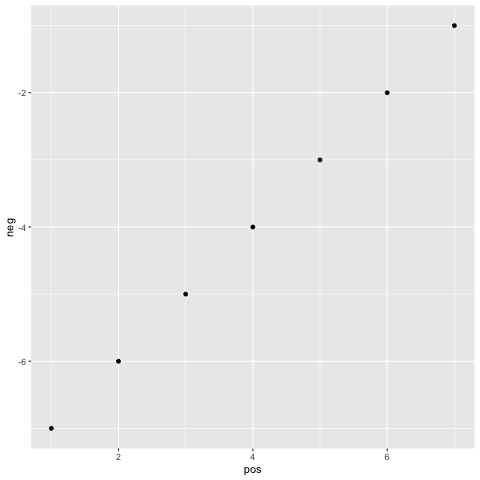

In [103]:
%%R -i python_data_frame
ggplot(python_data_frame,aes(x=pos,y=neg))+geom_point()

Or I can use the `%Rpush` in a python block

In [104]:
%Rpush python_vector

In [105]:
%%R
python_vector

 [1]  1  2  3  4  5  6  7 -7 -6 -5 -4 -3 -2  1


These are really just the absolute basics of how R and Python can interact. Our main purpose for setting up this bridge is that we will be using Python to interact with online data and then using it to pass into R. 

#### A Note for Rstudio Users

In order to use Python variables in your R code you should use the format `py$python_variable` So for instant to get the Python vector as I did above in R studio I would the following in Rstudio

```
```{python}
python_vector = np.array([1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,1])
`` `
```

```
```{r}
py$python_vector
`` `
```

## Interacting with Data Online

### APIs

APIs are the driving force behind data mash-ups. It is APIs that allow machines to access data programmatically (that is automatically from within a program) to make use of API provided functionalities and data. Without APIs much of today's Web 2.0, Apps and data applications would be outright impossible.

#### Background on APIs
API is short for **Application Programming Interface.** Basically, it means a way of accessing the functionality of a program from inside another program. So instead of performing an action using an interface that was made for humans, a point and click GUI for instance, an API allows a program to perform that action automatically. The power of this concept becomes only visible, when you imagine that you can mesh the calling of an API in the program with anything else that program might want to do. Some examples from data science:

- Retrieve data and produce a visualization from it that gets updated every time someone looks at it
- Have tweets automatically translated and entities reported
- Have additional nodes in a computer cluster launched as soon as tasks become cumbersome, to ensure fast data processing

While an API can be any defined interface between two programs, today APIs usually refer to a special kind of APIs that are based on the WWW's HyperText Transfer Protocol (HTTP) that is also used by web servers and browsers to exchange data. Indeed, one might consider browsing the web as using APIs: a program (the browser) uses a defined set of commands and conventions to retrieve data (the webpage) from a remote server (the website) and renders it locally in the browser (the thing you see).

All web-based APIs have always the same structure: they consist of a URL to a domain and a path to an endpoint. For instance: *http://example.com/api* where *http://example.com* is the URL and /api is the path to the endpoint.

A canonical example would be an API that allows one to retrieve data from some database. The API's query can be used to narrow down the selection. Let's say an API provides access to newspaper articles. By specifying the parameter year the API returns not all articles, but only those that were written in a specific year. Let's say we are only interested in articles written in 2014. The corresponding API call would, thus, look like: `http://example.com/api?year=2014.` We already know which part is the URL and which part is the path to the endpoint. What's new is the query `year=2014`. Note that it's separated from the path by a question mark. In this example, year is the name of the parameter, and 2014 is its value.

For instance, we can use the website https://cat-fact.herokuapp.com. This website gives different animal facts. We can use a similar call to the example above but since this website has nothing to do with news articles or yearsinstead of `year` we will use `animal_type` which is a parameter for this API.

When we plug `https://cat-fact.herokuapp.com/facts/random?animal_type=horse&amount=2` as a url into a web browser we are sending an API call.  

Upon receiving the API call, the remote system crafts an answer. The answer can be in any format. It could be a image file, or a movie, or text, or anything number of things. In recent years, JSON (JavaScript Object Notation) has become the most common answer format by far. JSON is a simple text file that uses special characters and conventions to bring structure into its contents. You can find more info at the Wikipedia page on JSON (https://en.wikipedia.org/wiki/JSON). For now it suffices to know that it is a popular format to store data, that can potentially be nested and delivered together with metadata. And that both R and Python can process it quite easily.


The response we get from the call `https://cat-fact.herokuapp.com/facts/random?animal_type=horse&amount=2` is 

<img src="LAB5img1.png">

This is the JSON form of the response from the API. We can see that there are two entries; 0 and 1. We can also see that the text of these entries are facts about horses.

0. Horses use their ears, eyes and nostrils to express their mood. They also communicate their feelings through facial expressions.
1. Most horses gallop at around 44 kph or 27 mph.

When we look at the raw data we can see the same information in a different format,

<img src="LAB5img2.png">


The big problem with APIs is that they are always designed by humans. So APIs vary wildly in logical structure and the quality of documentation. This unfortunately means, that there is no simple catch-all solution for working with APIs and all programs will need to be custom tailored to the API used. This also means that using an API almost always requires programming to some degree. Using Python makes sifting through API responses much easier.

#### API Requests

Web-based APIs requests that are used for data science come usually in two flavors that are named after the HTTP verbs defined:

`GET` - sends a set of parameters, a query to an endpoint and then receives an answer.

`POST`- sends a data payload to an endpoint to be processed at the remote system, usually receiving only a success message as an answer.

In order to use almost any API in Python you will need the `requests` library. The `requests` lets Python send `POST` and `GET` requests through http.

In [1]:
import requests as req

We can use the requests library to perform the API call for horse facts that we did above. However, this time we can put in parameters and pull specific inforamtion from the response, i.e. the horse facts.

In [107]:
response=req.get('https://cat-fact.herokuapp.com/facts/random?animal_type=horse&amount=2')

There are a few things that we should do before we start working with the response we received. First we should check the response to make sure our query worked. We are looking to get a response of `200`. We use `status_code` to get the response.

In [108]:
response.status_code

200

Huzzah! We got the `200` response. This means that our query was successful. Other responses to keep in mind are 

- `204` : No content. This means your query was ok, but there isn't any content associated to the query.
- `400` : Bad request. This means that there is a mistake in your query.
- `401` : Unauthorized. This means that you need some authentification to access the content.
- `403` : Forbidden: This means you aren't allowed to access this content.
- `404` : Not Found: This means that your API endpoitn is correct but one of your parameters probably doesn't exist.

Let's look at the content we pulled.

In [109]:
response.content

b'[{"status":{"verified":true,"sentCount":1},"type":"horse","deleted":false,"_id":"5b7a06ee2048fd0014e9d8a7","updatedAt":"2020-09-16T20:20:04.165Z","createdAt":"2018-08-20T00:10:22.091Z","user":"5a9ac18c7478810ea6c06381","text":"There are approximately 58 million horses in the world and the vast majority are cared for by humans.","source":"user","__v":0,"used":true},{"status":{"verified":true,"sentCount":1},"type":"horse","deleted":false,"_id":"5b7a07552048fd0014e9d8ac","updatedAt":"2020-09-26T05:38:38.980Z","createdAt":"2018-08-20T00:12:05.725Z","user":"5a9ac18c7478810ea6c06381","text":"Horses are generally thought of as grazers (animals that eat grass) as opposed to browsers (animals that eat leaves, shrubs, and brushy plants).","source":"user","__v":0,"used":true}]'

This looks similar to the raw data from our url request. That's because it is. Now we just need to pull out our horse facts. To do this it is easier to work with the JSON format. To see the JSON format we just use `response.json()`

In [110]:
response.json()

[{'status': {'verified': True, 'sentCount': 1},
  'type': 'horse',
  'deleted': False,
  '_id': '5b7a06ee2048fd0014e9d8a7',
  'updatedAt': '2020-09-16T20:20:04.165Z',
  'createdAt': '2018-08-20T00:10:22.091Z',
  'user': '5a9ac18c7478810ea6c06381',
  'text': 'There are approximately 58 million horses in the world and the vast majority are cared for by humans.',
  'source': 'user',
  '__v': 0,
  'used': True},
 {'status': {'verified': True, 'sentCount': 1},
  'type': 'horse',
  'deleted': False,
  '_id': '5b7a07552048fd0014e9d8ac',
  'updatedAt': '2020-09-26T05:38:38.980Z',
  'createdAt': '2018-08-20T00:12:05.725Z',
  'user': '5a9ac18c7478810ea6c06381',
  'text': 'Horses are generally thought of as grazers (animals that eat grass) as opposed to browsers (animals that eat leaves, shrubs, and brushy plants).',
  'source': 'user',
  '__v': 0,
  'used': True}]

Now we can iterate through each entry.

In [111]:
for fact_data in response.json():
    print(fact_data["text"])

There are approximately 58 million horses in the world and the vast majority are cared for by humans.
Horses are generally thought of as grazers (animals that eat grass) as opposed to browsers (animals that eat leaves, shrubs, and brushy plants).


There we go. We successfully called a website, pulled data from it, and then displayed our desired data in Python.

One thing we can note is that sometimes our queries can get quite long. However, we don't always need to include them in the url. We can use headers and parameters instead

In [112]:
response=req.get('https://cat-fact.herokuapp.com/facts/random', params={'animal_type': 'horse', 'amount': '2'})

This code is that same as the one before but instead of using a long url we used parameters. Now let's do the whole process in a single cell.

In [113]:
response=req.get('https://cat-fact.herokuapp.com/facts/random', params={'animal_type': 'horse', 'amount': '2'})
for fact_data in response.json():
    print(fact_data["text"])

The record for the highest jump made by a horse is held by a horse named Huaso who jumped 8 feet, 1 and 1/4 inches on February 5th, 1949 in Vina del Mar, Chile. He was ridden by Captain Alberto Larraguibel.
Horses produce approximately 10 gallons of saliva a day.


That is a good toy example, but let's do something more complex.

#### Data.gov
**Data.gov** catalogs government data and makes them available on the web; you can find data in a variety of topics such as agriculture, business, climate, education, energy, finance, public safety and many more. It is a good start point for finding data if you don't already know which particular data source to begin your search, however it can still be time consuming when it comes to actually download the raw data you need. Fortunately, Data.gov also includes APIs from across government, which can help with obtaining raw datasets. 


A lot of agencies nowadays don't let just anyone access their API. In some cases you may have to pay for it, but in others it is as easy as just confirming your email. Data.gov is one where all you need to do is verify your email to get access to the API.

Get your API key at: https://api.data.gov/signup/. In order to run a lot of the following codes you will need your API key. Since your API key is a personal identification it is probably best to keep this in a separate file and load it into Python.

##### College Scorecard Data API
Data.gov is quite large and has over 250,000 data sets to investigate. By getting your own API key you will have access to them all.

The College Scorecard project provides information of college costs and outcomes at individual postsecondary institution level. Reading the documentation of this data will help with understanding how this dataset is structured. **ALWAYS READ THE DOCUMENTATION**

In the following example, we'll download all available data for Gonzaga University, then extract variables from the downloaded data.

Set the variable **myapikey** to the api key sent to you in your email.

In [114]:
f = open("gov_apikey.txt")
gov_apikey = f.read();
f.close();

Now we set our URL to our API endpoint and then request data about Gonzaga University.

In [256]:
URL = "https://api.data.gov/ed/collegescorecard/v1/schools?"
gonzaga_response = req.get(URL, params={'api_key' : gov_apikey, 'school.name':'Gonzaga University'})

Again, seeing the JSON of the data is a bit easier. The JSON format is in the form of a Python dictionary. Dictionaries are convienient lists that help you access specific entries by keys. Let's look at the keys in the response. Here we can see that there are two keys; `metadata` and `results`. We want what is in the results portion

In [258]:
gonzaga_response.json().keys()

dict_keys(['metadata', 'results'])

We can select what is in the results portion. If we do this then we get a complete read out of all the data that college scorecard has on Gonzaga.

In [262]:
gonzaga_response.json()['results'][0].keys()

dict_keys(['2012', '2011', '2010', '2009', '1998', '2008', '1997', '2007', '1996', '2006', '2005', 'school', '2004', '2003', '2002', 'id', 'latest', '1999', '2001', '2000', 'fed_sch_cd', '2018', 'ope6_id', '2017', '2016', '2015', '2014', '2013', 'ope8_id', 'location'])

OK. So it is broken down by year. Let's see if we can find what the tuition was in 2018.

In [119]:
gonzaga_data.json()['results'][0]['2018']['cost']

{'avg_net_price': {'private': 33545,
  'public': None,
  'other_academic_year': None,
  'overall': 33545,
  'program_year': None},
 'net_price': {'private': {'by_income_level': {'0-48000': 25268,
    '30001-75000': 27806,
    '30001-48000': 25802,
    '75000-plus': 36083,
    '0-30000': 24865,
    '75001-110000': 33156,
    '110001-plus': 37136,
    '48001-75000': 29034}},
  'public': {'by_income_level': {'0-48000': None,
    '30001-75000': None,
    '30001-48000': None,
    '75000-plus': None,
    '0-30000': None,
    '75001-110000': None,
    '110001-plus': None,
    '48001-75000': None}},
  'other_acad_calendar': {'by_income_level': {'0-48000': None,
    '30001-75000': None,
    '30001-48000': None,
    '75000-plus': None,
    '0-30000': None,
    '75001-110000': None,
    '110001-plus': None,
    '48001-75000': None}},
  'program_reporter': {'by_income_level': {'0-48000': None,
    '30001-75000': None,
    '30001-48000': None,
    '75000-plus': None,
    '0-30000': None,
    '75001

In [120]:
gonzaga_data.json()['results'][0]['2018']['cost']['tuition']

{'out_of_state': 43210, 'in_state': 43210, 'program_year': None}

In [121]:
gonzaga_data.json()['results'][0]['2018']['cost']['tuition']['in_state']

43210

So we now know what the tution of Gonzaga was in 2018. Using this list of keys we can pull the complete data about the tuition.

In [122]:
years= range(1996,2019)

year_tuition=[]

for year in years:
    year_tuition.append([year,gonzaga_data.json()['results'][0][str(year)]['cost']['tuition']['in_state']])

gonzaga_data=pd.DataFrame(year_tuition, columns=['year', 'tuition'])

Now we can graph it using ggplot

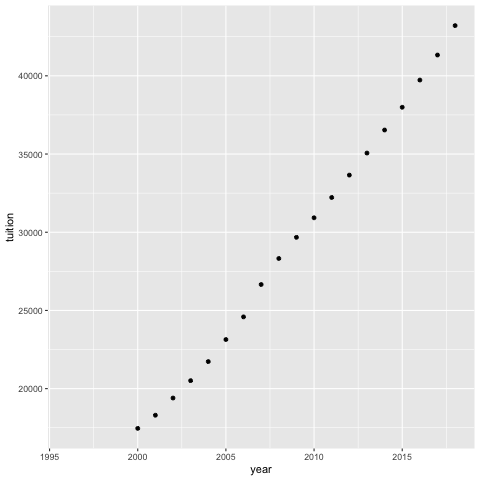

In [123]:
%%R -i gonzaga_data
ggplot(gonzaga_data,aes(x=year,y=tuition))+
  geom_point()

We have successfully pulled data from the college scorecard API and used it to create a scatterplot in R. We can do all of this in R, but the code is just a little unwieldy compared to Python. Let's see how Python can really help us. 

The Peer 11 is a list of 11 schools that Seattle University (https://www.seattleu.edu/ir/peer-data/) uses in a lot of its analysis. "Peer institutions provide benchmark comparisons that are essential to the university's assessment strategies and are used as one component in determining the relative health, growth and trajectory of the university." These universities are:
- Creighton University 
- Gonzaga University   
- Loyola University Maryland   
- Loyola Marymount University 
- Santa Clara University   
- University of Denver   
- University of Portland   
- University of San Diego   
- University of San Francisco   
- University of the Pacific   
- Xavier University 

Let's use Python to create a tution comparison chart for these schools and Seattle University.


In [429]:
schools=["Seattle University",
         "Creighton University",
         "Gonzaga University", 
         "Loyola University Maryland", 
         "Loyola Marymount University", 
         "Santa Clara University",
         "University of Denver",
         "University of Portland",
         "University of San Diego",
         "University of San Francisco",
         "University of the Pacific",
         "Xavier University"]
school_data={}

URL = "https://api.data.gov/ed/collegescorecard/v1/schools?"

for school in schools:

    school_data[school] = req.get(URL, params={'api_key' : gov_apikey, 'school.name': school})

years= range(1996,2019)

year_tuition=[]

for school in schools:
    for year in years:
        year_tuition.append([year,school_data[school].json()['results'][0][str(year)]['cost']['tuition']['in_state'],school])

school_df=pd.DataFrame(year_tuition, columns=['year', 'tuition', 'school'])    

JSONDecodeError: Extra data: line 1 column 5 (char 4)

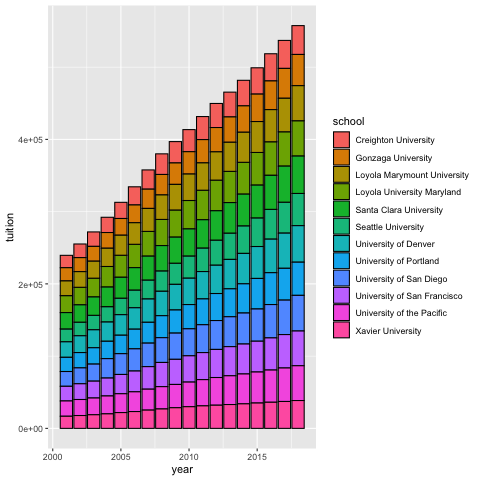

In [125]:
%%R -i school_df
filter(school_df,year>2000)%>%ggplot(aes(x=year,y=tuition))+
  geom_col(aes(fill=school),color='black')

So in a limited amount of code we pulled data tuition data from the past 18 years for 12 schools and then produced a plot in R. 

#### Spotify API

One of the other benefits of working with Python is that there is a rich development culture. There are lots of developers out there creating libraries that can make things a lot simpler. For instance, `spotipy` is a Python library for connecting to the Spotify API (https://spotipy.readthedocs.io/en/2.16.1/). 

In order to do a lot of what I do with the Spotify API, you will need to set up a developer account and get some API credentials. You can find out more here, https://developer.spotify.com/


The first thing I need to do is install `spotipy`

In [126]:
!pip install spotipy --upgrade

Requirement already up-to-date: spotipy in /Users/stewaral/opt/anaconda3/lib/python3.8/site-packages (2.16.1)


Now I import the library, read in my credentials, then open connect to the API.

In [127]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

f = open("SPOTIPY_CLIENT.txt")
SPOTIPY_CLIENT_ID= f.read();
f.close();

f = open("SPOTIPY_SECRET.txt")
SPOTIPY_CLIENT_SECRET= f.read();
f.close();


auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)

sp = spotipy.Spotify(auth_manager=auth_manager)

It is helpful to read the documentation on Spotipy, https://spotipy.readthedocs.io/en/2.16.1/#, in order to work with it in detail. However, for right now I would just like to pull the data from a single artist.

In this case I will pull the top tracks along with their popularity number from the artist Japanese Breakfast. 

> "The score is received from the Spotify API. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are."

To access an artist you need the artist uri in this case the uri is `spotify:artist:7MoIc5s9KXolCBH1fy9kkw`. 

In [128]:

jb_uri = 'spotify:artist:7MoIc5s9KXolCBH1fy9kkw'

results = sp.artist_top_tracks(jb_uri)

results

for track in results['tracks'][:10]:
   print('track    : ' + track['name'])
   print('popularity    : ' + str(track['popularity']))
   print()

track    : Road Head
popularity    : 56

track    : Boyish
popularity    : 54

track    : Diving Woman
popularity    : 50

track    : Everybody Wants to Love You
popularity    : 47

track    : Head Over Heels
popularity    : 46

track    : Dreams - Recorded at Spotify Studios NYC
popularity    : 45

track    : Till Death
popularity    : 43

track    : Essentially
popularity    : 42

track    : Soft Sounds from Another Planet
popularity    : 41

track    : Machinist
popularity    : 41



Let compare the popularity of songs in two different playlists; lofi hip hop music - beats to relax/study to and United States Top 50. We expect that the Top 50 playlist to have more popular songs.

In [129]:
lf_uri='spotify:playlist:0vvXsWCC9xrXsKd4FyS8kM'
top_uri='spotify:playlist:37i9dQZEVXbLRQDuF5jeBp'
low_fi = sp.playlist_tracks(lf_uri, market="US")
top = sp.playlist_tracks(top_uri, market="US")

popularity=[]

for track in low_fi['items']:
    popularity.append([track['track']['popularity'],'low_fi'])

for track in top['items']:
    popularity.append([track['track']['popularity'],'top'])
    
    
pop_df=pd.DataFrame(popularity,columns=['popularity','playlist'])    

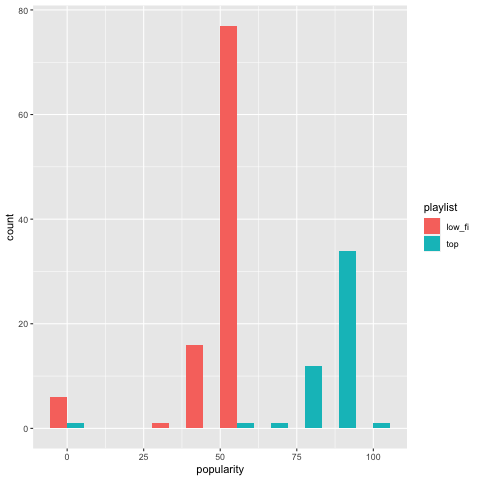

In [130]:
%%R -i pop_df

ggplot(pop_df,aes(x=popularity))+
    geom_histogram(bins=10,aes(fill=playlist),position="dodge")

#### Other APIs

There are lots of APIs that you can potentially play around with. Here is a list of public apis

- https://github.com/public-apis/public-apis

All social media platforms have APIs. 

- https://developers.facebook.com/
- https://www.instagram.com/developer/
- https://developers.tiktok.com/
- https://www.reddit.com/dev/api/

However, in almost all of them you will need some type of key and then it is possible that you will only be able to access public accounts and/or any accounts that your user account has access to.

### Remote Servers
You may at some point you may need to access information that is located on a computer (or server) in a distant location. This can happen when data is being collected by a device in a remote location or data is stored on a cloud device. One way to do this is through secure shell, file transfer protocol, and secure copy. You can also use a Virtual Private Network to set up a remote desktop. However, not all server have desktops which means that you will need to access and do all work on them via terminal applications, i.e. no graphics or mouse.  

#### Secure Shell
SSH stands for secure shell. To start, open up Terminal. Once you have opened the Terminal, you'll be ready to log in to your SSH account.

The SSH included in a Mac/Linux is a little different from the one which you would have installed on a Windows machine. On  a Windows computer, you can either enter your username into a GUI, or use commands in the Command Prompt (which is the Windows version of the Mac Terminal) to log in. On Mac/Linux, you don't have that GUI, so you're going to log in using a single command. This is actually a little quicker than using a GUI. Let's get to it:

In the terminal, type:

**ssh username@server.com**

Hit enter and you'll be prompted for a password. The password is case-sensitive, naturally. Notice that the characters that you type don't appear onscreen. SSH is more responsible about web security than I am. Once you have entered your password, hit enter again. If you've logged in successfully. 

You are now using a terminal located in the remote server. This means you can edit files and run programs located on the remote server. 

#### Secure Copy
SCP stands for secure cp (copy), which means that you can copy files across an ssh connection that will be encrypted, and therefore secured.

Using secure copy you can copy files from or to a remote server, you can even copy files from one remote server to another remote server.

Usage

**scp [[user@]from-host:]source-file [[user@]to-host:][destination-file]**

If you are on a windows machine then all the commands above won't work. You will need most likely need to use Putty or winscp.

### Databases

One type of server that you may need to access is a SQL server. If you are looking to get into data science or programming then by far the most important language that you will need to learn is SQL. There are different types of SQL

- SQL Server 	
- MySQL 	
- PostgreSQL 	
- SQLite

The most popular SQL is MySQL, but that doesn't mean you won't run into the other types. This can be frustrating because each SQL has a different syntax. Even though the syntaxes may be different the basic structure and idea of the languages is the same.

#### What is SQL?
It's a language for querying relational databases
SQL is a programming language specifically designed for storing and quering relational databases. 

#### What is a relational database?
In short, it's a database that structures information across many tables (think dataframes or spreadsheets), each of which is linked by a set of unique identifiers. 


#### How is this different from traditional R data storage?
To be honest, analysts in R likely store their data in a manner very similar to a relational database. People using R in the most traditional format, with data stored in a dataframe (essentially a rectangular grid with rows and columns).

With this storage setup, an R user might reshape the dataframe using basic R code or special packages like ``dplyr``. 

Now let's turn to relational databases and SQL. A relational database would take the same data and structure it across several linked ``tables.`` 

Users would then use SQL commands to construct queries and return results sets.

The basic SQL commands are 

- ``SELECT`` : extracts data from a database  
    - ``FROM`` : Tells  the command which table to pull from  
    - ``WHERE`` : Restricts the selections to rows with specified properties.  
- ``UPDATE`` : updates data in a database  
- ``DELETE`` : deletes data from a database  
- ``INSERT INTO`` : inserts new data into a database  

By far the most important SQL command is the ``JOIN`` command. This command allows you to construct a new table from existing tables in the database. This allows for one to perform analysis on the data collected. It is one key part of the following system.

Raw Data->Collection->Clean->SQL Database->Clean->Join Tables->Data Frame->Statistics

In both storage styles (dataframe vs relational tables) and syntax types (R vs SQL) the user is doing the same thing: simply modifying the structure of the data grids without changing the underlying data itself. SQL syntax may look much more complex, but that's not inevitable. When datasets become huge, complex, and disperse, it can be much more clear than R code. 

#### SQL in R

It is possible to connect to a SQL database and use SQL queries in R. You can do this via the DBI and RSQLite packages. Fortunately the DBI package has a preloaded SQL database of all the preloaded databases in R. First you would need to download the DBI and RSQLite packages 

```
install.packages("DBI")
install.packages("RSQLite")
```

Then you could load the libraries, connect to the `datasetsDb`, and look at the available tables.

In [131]:
%%R
library(DBI)
db = dbConnect(RSQLite::datasetsDb())
dbListTables(db)

 [1] "BOD"              "CO2"              "ChickWeight"      "DNase"           
 [5] "Formaldehyde"     "Indometh"         "InsectSprays"     "LifeCycleSavings"
 [9] "Loblolly"         "Orange"           "OrchardSprays"    "PlantGrowth"     
[13] "Puromycin"        "Theoph"           "ToothGrowth"      "USArrests"       
[17] "USJudgeRatings"   "airquality"       "anscombe"         "attenu"          
[21] "attitude"         "cars"             "chickwts"         "esoph"           
[25] "faithful"         "freeny"           "infert"           "iris"            
[29] "longley"          "morley"           "mtcars"           "npk"             
[33] "pressure"         "quakes"           "randu"            "rock"            
[37] "sleep"            "stackloss"        "swiss"            "trees"           
[41] "warpbreaks"       "women"           


We can make a query and only select the treated cells from Puromycin. In SQL this would look like

`select state, rate, conc from Puromycin where state="treated"`

Or we could use R and the DBI library

In [132]:
%%R
Puromycin_SQL_ex <- dbSendQuery(db, "SELECT state,rate,conc FROM Puromycin WHERE state = 'treated'")
dbFetch(Puromycin_SQL_ex)

     state rate conc
1  treated   76 0.02
2  treated   47 0.02
3  treated   97 0.06
4  treated  107 0.06
5  treated  123 0.11
6  treated  139 0.11
7  treated  159 0.22
8  treated  152 0.22
9  treated  191 0.56
10 treated  201 0.56
11 treated  207 1.10
12 treated  200 1.10


#### SQL in Python

You can also use SQL in Python. There are a few packages that make facilitate connecting to a SQL database in Python. 

- sqlite3 : For connecting to SQLite databases
- mysql-connector-python : For connecting to MySQL databases
- psycopg2 : For connecting to PostgreSQL

If you are using a Jupyter notebook it is also possible to create a SQL magic using `ipython-sql` and `sqlalchemy` packages. 

For the purposes of this lab though, I want to focus on using the `sqlite3` package. Python automatically comes with the `sqlite3` package which allows from connection to SQLite databases. The advantage of SQLite databases is that they are serverless and can be contained in files. So for instance, I can download the `lahman` baseball database that we have used previously as a SQLite database, whic is available here, http://www.seanlahman.com/baseball-archive/statistics/.

Once I have the database file on my computer I can connect to the database. Here I have created function that will start the connection and give an error if the connection fails.

In [133]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")

    except Error as e:
        print(f"The error '{e}' occurred")
    return connection

In [264]:
connection = create_connection("/Users/stewaral/Downloads/lahmansbaseballdb.sqlite")

Connection to SQLite DB successful


We have successfully connected to the database and now we can run queries. The simplest query to run would be to see all the tables in the database. To do this we will make use of the `sqlite_master` table. This table contains information about all the tables in the database.

In [265]:
c = connection.cursor()
c.execute("select * from sqlite_master where type='table'")

We didn't get an error and so we have successfully pulled the data. If we just printed this we would get a big mess. A better way to perform these queries is to make use of the `pandas` library. 

In [136]:
lahman_tables = pd.read_sql_query("select * from sqlite_master where type='table'", connection)
lahman_tables

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n\t""ID"" INTEGER N..."
1,table,appearances,appearances,151,"CREATE TABLE ""appearances"" (\n\t""ID"" INTEGER N..."
2,table,awardsmanagers,awardsmanagers,3436,"CREATE TABLE ""awardsmanagers"" (\n\t""ID"" INTEGE..."
3,table,awardsplayers,awardsplayers,3445,"CREATE TABLE ""awardsplayers"" (\n\t""ID"" INTEGER..."
4,table,awardssharemanagers,awardssharemanagers,3603,"CREATE TABLE ""awardssharemanagers"" (\n\t""ID"" I..."
5,table,awardsshareplayers,awardsshareplayers,3622,"CREATE TABLE ""awardsshareplayers"" (\n\t""ID"" IN..."
6,table,batting,batting,3757,"CREATE TABLE ""batting"" (\n\t""ID"" INTEGER NOT N..."
7,table,battingpost,battingpost,6554,"CREATE TABLE ""battingpost"" (\n\t""ID"" INTEGER N..."
8,table,collegeplaying,collegeplaying,7006,"CREATE TABLE ""collegeplaying"" (\n\t""ID"" INTEGE..."
9,table,divisions,divisions,7282,"CREATE TABLE ""divisions"" (\n\t""ID"" INTEGER NOT..."


As we can see there are 28 tables. The two that we are familiar with are `Batting` and `People`. Let's perform a query that will give us all the Seattle Mariner players that have been at bat but not gotten a hit throughout a season.

In [137]:
SEA_no_hits = pd.read_sql_query("SELECT * FROM Batting where teamID='SEA' AND AB>0 AND H=0", connection)
SEA_no_hits

,ID,playerID,yearID,stint,teamID,team_ID,lgID,G,G_batting,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,55062,mcmilto02,1977,1,SEA,1731,AL,2,None,5,...,0,0,0,0,0,0,0,0,0,0
1,58342,allenki01,1981,1,SEA,1835,AL,19,None,3,...,0,2,1,0,2,0,0,0,0,0
2,58579,firovda01,1981,1,SEA,1835,AL,13,None,2,...,0,0,0,0,1,0,0,0,0,0
3,59225,waltore01,1981,1,SEA,1835,AL,12,None,6,...,0,0,0,1,2,0,0,0,0,0
4,59528,firovda01,1982,1,SEA,1861,AL,3,None,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,106654,leakemi01,2019,1,SEA,2919,AL,22,None,1,...,0,0,0,1,0,0,0,0,0,0
136,106800,milonto01,2019,1,SEA,2919,AL,23,None,2,...,0,0,0,0,1,0,0,0,0,0
137,107143,sheffju01,2019,1,SEA,2919,AL,8,None,2,...,0,0,0,0,2,0,0,0,0,0
138,107239,suzukic01,2019,1,SEA,2919,AL,2,None,5,...,0,0,0,1,1,0,0,0,0,0


One of the issues that we faced when working with the `lahman` datasets was that the `Batting` data set did not have the first and last name of the players. This meant that we couldn't easily search for Hank Aaron. Let's make a new data set using `join` where we can more easily search.

In [138]:
Batting_w_People = pd.read_sql_query("SELECT * FROM Batting JOIN People ON People.playerID=Batting.playerID", connection)
Batting_w_People

,ID,playerID,yearID,stint,teamID,team_ID,lgID,G,G_batting,AB,...,bats,throws,debut,finalGame,retroID,bbrefID,birth_date,debut_date,finalgame_date,death_date
0,1,abercda01,1871,1,TRO,8,NA,1,None,4,...,None,None,1871-10-21,1871-10-21,aberd101,abercda01,1850-01-02,1871-10-21,1871-10-21,1939-11-11
1,2,addybo01,1871,1,RC1,7,NA,25,None,118,...,L,L,1871-05-06,1877-10-06,addyb101,addybo01,None,1871-05-06,1877-10-06,1910-04-09
2,3,allisar01,1871,1,CL1,3,NA,29,None,137,...,None,None,1871-05-04,1876-10-05,allia101,allisar01,1849-01-29,1871-05-04,1876-10-05,1916-02-25
3,4,allisdo01,1871,1,WS3,9,NA,27,None,133,...,R,R,1871-05-05,1883-07-13,allid101,allisdo01,1846-07-12,1871-05-05,1883-07-13,1916-12-19
4,5,ansonca01,1871,1,RC1,7,NA,25,None,120,...,R,R,1871-05-06,1897-10-03,ansoc101,ansonca01,1852-04-17,1871-05-06,1897-10-03,1922-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,107425,zimmejo02,2019,1,DET,2905,AL,23,None,2,...,R,R,2009-04-20,2019-09-26,zimmj003,zimmejo02,1986-05-23,2009-04-20,2019-09-26,None
107425,107426,zimmeky01,2019,1,KCA,2907,AL,15,None,0,...,R,R,2019-03-31,2019-09-27,zimmk001,zimmeky01,1991-09-13,2019-03-31,2019-09-27,None
107426,107427,zimmery01,2019,1,WAS,2925,NL,52,None,171,...,R,R,2005-09-01,2019-09-29,zimmr001,zimmery01,1984-09-28,2005-09-01,2019-09-29,None
107427,107428,zobribe01,2019,1,CHN,2901,NL,47,None,150,...,B,R,2006-08-01,2019-09-29,zobrb001,zobribe01,1981-05-26,2006-08-01,2019-09-29,None


If we look at the column names, we can then see that we have one data set with both the information from `Batting` and the information from `People`. 

In [139]:
Batting_w_People.columns

Index(['ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G',
       'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'playerID', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState',
       'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height',
       'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID',
       'birth_date', 'debut_date', 'finalgame_date', 'death_date'],
      dtype='object')

Now we can now put this new data set into R and filter for Hank Aaron by name to create a new data set and create a scatterplot of his  homeruns per season. 

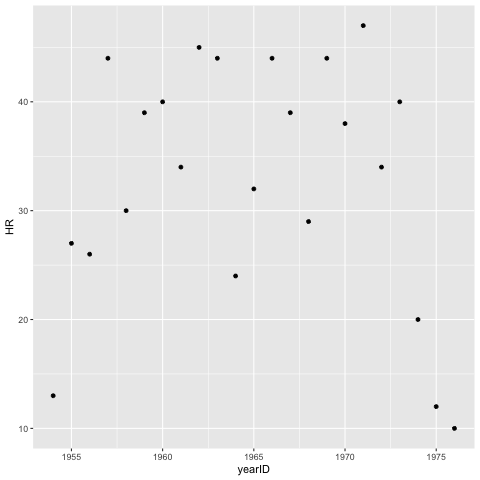

In [140]:
%%R -i Batting_w_People

filter(Batting_w_People,nameFirst=="Hank",nameLast=="Aaron")%>% 
    ggplot(aes(x=yearID,y=HR))+geom_point()

Since I am no longer going to use this database in these notes, I need to close the connection

In [141]:
connection.close()

I should say that it is also possible to join data frames separately from SQL in both Python and R. For Python the ability to join comes along with the `pandas` packages and for R it comes with the `mutate` and `dplyr` packages. 

### Web Scraping

This is by far one of the more powerful aspects of Python with respect to data science. The ability to scrap information from websites. There will be a few packages that we will be using. 

- `requests` : we have already used requests when we were talking about APIs
- `bs4` : This packages is Beautiful Soup. It is designed to for pulling data out of HTML and XML files. 

So the basic idea here will be to request data from a webpage via `requests` and then parse through the response using Beautiful Soup. 

Let's do a simple example. 

#### Pulling a Table

In previous labs and on some worksheets we have worked with data about movies. I pulled this data from the website https://www.the-numbers.com However if we look  at this website we see that the data is displayed as a table and I don't see anywhere to download a csv.

<img src="LAB5img3.png">

So let's scrap the table

The first thing I need to do is make sure that I have loaded 

- requests
- pandas 

which I have done above. Now I import `BeautifulSoup`.

In [90]:
from bs4 import BeautifulSoup as bs

Now we request data and then pull the table

In [410]:
url="https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time"
response=req.get(url)
response_bs=bs(response.content, "html.parser")
movies_html = response_bs.find_all("table")

Our `movies_html` variable is a beautiful soup object that has the table data in html format. Now we just need to transform this table from html format to pandas data frame format. Luckily `pandas` allows us to do this quite easily.

In [411]:
movies_html = response_bs.find_all("table")
movies = pd.read_html(str(movies_html))[0]

In [412]:
movies

,Rank,Year,Movie,Distributor,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,2015,Star Wars Ep. VII: The Force Awakens,Walt Disney,"$936,662,225","$1,128,815,859","$2,065,478,084"
1,2,2019,Avengers: Endgame,Walt Disney,"$858,373,000","$1,939,427,564","$2,797,800,564"
2,3,2009,Avatar,20th Cent…,"$760,507,625","$2,028,193,712","$2,788,701,337"
3,4,2018,Black Panther,Walt Disney,"$700,059,566","$636,434,755","$1,336,494,321"
4,5,2018,Avengers: Infinity War,Walt Disney,"$678,815,482","$1,365,725,041","$2,044,540,523"
...,...,...,...,...,...,...,...
95,96,2007,Harry Potter and the Order of the Phoenix,Warner Bros.,"$292,137,260","$648,606,680","$940,743,940"
96,97,1980,Star Wars Ep. V: The Empire Strikes Back,20th Cent…,"$291,738,960","$257,262,282","$549,001,242"
97,98,2005,"The Chronicles of Narnia: The Lion, the Witch a…",Walt Disney,"$291,710,957","$428,828,615","$720,539,572"
98,99,2013,Man of Steel,Warner Bros.,"$291,045,518","$376,954,000","$667,999,518"


Here we only have the top 100 movies by domestic gross, but what if we wanted the top 1000 movies. To do this on the web we would have to click through a couple of websites. But using Python we can scrap through the rest pages and append this data to our movies data frame.

In [146]:
url="https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time"
endpoints=["101","201","301","401","501","601","701","801","901"]

for endpoint in endpoints:
    response=req.get(url + "/" + endpoint)
    response_bs=bs(response.content, "html.parser")
    movies_html = response_bs.find_all("table")
    movies_df=pd.read_html(str(movies_html))[0]
    movies=movies.append(movies_df, ignore_index=True)

In [147]:
movies

,Rank,Year,Movie,Distributor,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,2015,Star Wars Ep. VII: The Force Awakens,Walt Disney,"$936,662,225","$1,128,815,859","$2,065,478,084"
1,2,2019,Avengers: Endgame,Walt Disney,"$858,373,000","$1,939,427,564","$2,797,800,564"
2,3,2009,Avatar,20th Cent…,"$760,507,625","$2,028,193,712","$2,788,701,337"
3,4,2018,Black Panther,Walt Disney,"$700,059,566","$636,434,755","$1,336,494,321"
4,5,2018,Avengers: Infinity War,Walt Disney,"$678,815,482","$1,365,725,041","$2,044,540,523"
...,...,...,...,...,...,...,...
995,996,2017,The Mummy,Universal,"$80,101,125","$329,852,780","$409,953,905"
996,997,2012,Jack Reacher,Paramount…,"$80,070,736","$137,300,000","$217,370,736"
997,998,2015,Goosebumps,Sony Pict…,"$80,069,458","$78,823,842","$158,893,300"
998,999,2008,Cloverfield,Paramount…,"$80,048,433","$91,253,793","$171,302,226"


Now that we have a way to get all this data, let's try it on something a bit more interesting. The page https://www.the-numbers.com/movie/budgets/all contains information about the production budget as well as the gross of movies. Let's create a scatterplot of the gross vs the production budget for the top 1000 most costly movies. 

In [93]:
url="https://www.the-numbers.com/movie/budgets/all"
endpoints=["101","201","301","401","501","601","701","801","901"]

response=req.get(url)
response_bs=bs(response.content, "html.parser")
budgets_html = response_bs.find_all("table")
budgets=pd.read_html(str(budgets_html))[0]

for endpoint in endpoints:
    response=req.get(url + "/" + endpoint)
    response_bs=bs(response.content, "html.parser")
    budgets_html = response_bs.find_all("table")
    budgets_df=pd.read_html(str(budgets_html))[0]
    budgets=budgets.append(budgets_df, ignore_index=True)

In [277]:
budgets

,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,063,875","$1,045,663,875"
2,3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,396,099,202"
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,065,478,084"
4,5,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"
...,...,...,...,...,...,...
995,996,"Dec 11, 2015",The Ridiculous 6,"$60,000,000",$0,$0
996,997,"Mar 15, 2018",Sherlock Gnomes,"$59,000,000","$43,242,871","$87,527,651"
997,998,"Jan 18, 2019",The Kid Who Would Be King,"$59,000,000","$16,790,790","$28,296,983"
998,999,"Feb 9, 2016",Deadpool,"$58,000,000","$363,070,709","$784,682,527"


If we are going to do any analysis on this table we will need to change the columns into numeric variables. This means getting rid of the `$` and the `,`. I do this by selecting the end of the string and using the `replace` function. Then I change the `string` into a `float`

The `Unnamed:0` isn't doing anything so I am going to get rid of it and for future analysis I am going to add a year column. To do this we can pull the last 4 characters from the `ReleaseDate` column entries. 

I am doing this to avoid working with dates. And although we haven't covered it, dates and times can be very important in statistics. The most useful packagea for dealing with dates and times `lubridate` for R  and `datetime` in Python in case you want to work with dates in the future.

In [94]:
ProductionBudget=[]
DomesticGross=[]
WorldwideGross=[]
for i in range(0,1000):
    ProductionBudget.append(float(budgets["ProductionBudget"][i][1:].replace(",","")))
    DomesticGross.append(float(budgets["DomesticGross"][i][1:].replace(",","")))
    WorldwideGross.append(float(budgets["WorldwideGross"][i][1:].replace(",","")))

budgets["ProductionBudget"]=ProductionBudget
budgets["DomesticGross"]=DomesticGross
budgets["WorldwideGross"]=WorldwideGross

budgets=budgets[["ReleaseDate","Movie","ProductionBudget","DomesticGross","WorldwideGross"]]

years=[]
for date in budgets["ReleaseDate"]:
    years.append(date[-4:])

budgets["Year"]=years

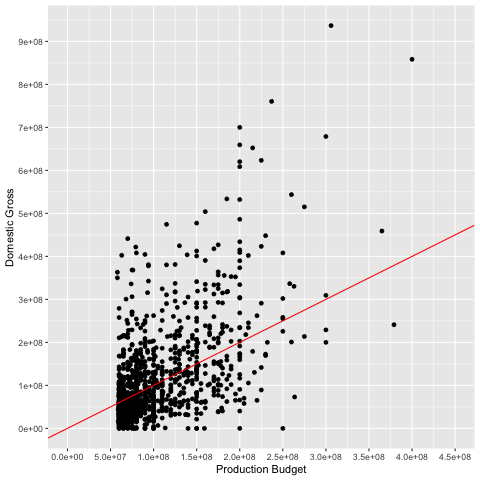

In [283]:
%%R -i budgets
ggplot(budgets,aes(x=ProductionBudget,y=DomesticGross))+
    geom_point()+
    geom_abline(slope=1,intercept=1,color="red")+
    scale_y_continuous(name="Domestic Gross", breaks=seq(0,1000000000,100000000))+
    scale_x_continuous(name="Production Budget", 
                       breaks=seq(0,500000000,50000000),
                       limits=c(0,450000000))


In the graph above, any dot above the line is a movie that grossed over its budget and any movie below the line did not. Let's see how successful 2020 has been for the movies industry compared to 2019. This is why I added the `year` column. 


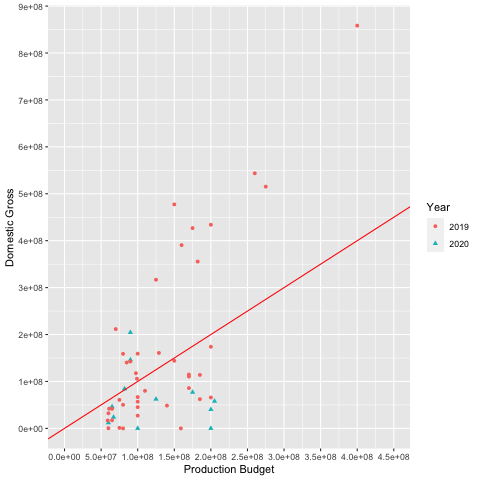

In [306]:
%%R -i budgets
filter(budgets, Year=="2019" | Year=="2020")%>%
    ggplot(aes(x=ProductionBudget,y=DomesticGross))+
    geom_point(aes(color=Year, shape=Year))+
    geom_abline(slope=1,intercept=1,color="red")+
    scale_y_continuous(name="Domestic Gross", breaks=seq(0,1000000000,100000000))+
    scale_x_continuous(name="Production Budget", 
                       breaks=seq(0,500000000,50000000),
                       limits=c(0,450000000))

It looks like only 3 movies in our list from 2020 made their production budget whereas about 17 movies made over their production budget in 2019. In terms of percentage of movies whose gross domestive is greater than their production budget we have

In [309]:
%%R

budgets_2019 <- filter(budgets,Year=="2019")
gross_over_prod_2019 <- filter(budgets_2019,
                               DomesticGross>ProductionBudget)
budgets_2020 <- filter(budgets,Year=="2020")
gross_over_prod_2020 <- filter(budgets_2020,
                               DomesticGross>ProductionBudget)

In [310]:
%%R
nrow(gross_over_prod_2020)/nrow(budgets_2020)

[1] 0.25


In [312]:
%%R
nrow(gross_over_prod_2019)/nrow(budgets_2019)

[1] 0.4047619


Thus 25% of the movies in our list from 2020 and 40.5% of movies in 2019 made their production budget.

#### Reddit Comments without the API

OK. So by far the best way to analyze behavior on Reddit is through the API. However, there is another way that we can do some analysis. If you add `.json` to the end of any Reddit page and you will get the JSON version of the page.

Using this fact with the `requests` library we can pull some data from a hardcoded page. At the time of me writing this lab, the top reddit post is https://www.reddit.com/r/AskReddit/comments/lhk6dg/what_fan_theory_do_you_100_accept_as_true/ 

Let's create a histogram of the length of some comments. Since we are not using the API we will only be able to access a few of the comments. Also, to keep things simple I will only be pulling the top most comments and not diving into any threads.

In order to access the json of webpages, Reddit requires a user agent. This is your web browser. I am putting in the version of firefox I use.

In [314]:
url="https://www.reddit.com/r/AskReddit/comments/lhk6dg/what_fan_theory_do_you_100_accept_as_true.json"
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:85.0) Gecko/20100101 Firefox/85.0'
}
response=req.get(url, headers=headers)

comment_lengths=[]

for comment in response.json()[1]['data']['children']:
    if 'body' in comment['data'].keys():
        comment_lengths.append(len(comment['data']['body']))
        
comment_lengths_df = pd.DataFrame(comment_lengths,columns=["lengths"])

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



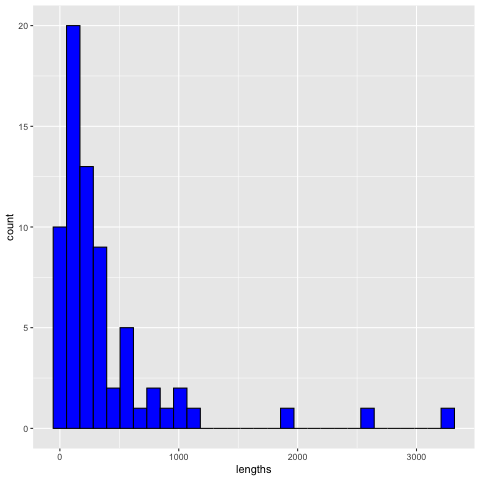

In [315]:
%%R -i comment_lengths_df

ggplot(comment_lengths_df,aes(x=lengths))+geom_histogram(color="black",fill="blue")

Earlier on in the class I made the claim that the length of comments on an internet post is accurately modeled by the log-normal distribution. We can test this statement by collecting the lengths of the comments and then plotting on a quantile plot with the log-normal distribution.

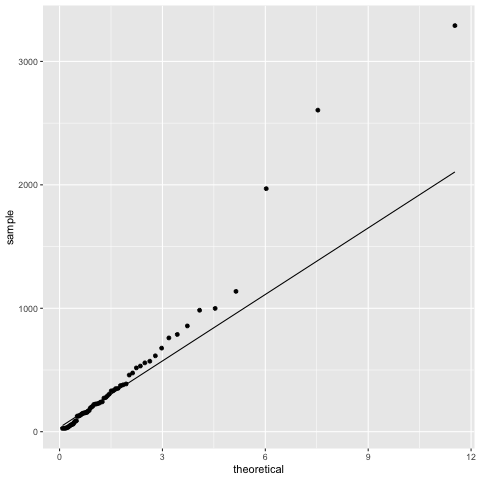

In [316]:
%%R -i comment_lengths_df

ggplot(comment_lengths_df,aes(sample=lengths))+
    stat_qq(distribution=qlnorm)+
    stat_qq_line(distribution=qlnorm)

Looking at the graph it appears that out data from the Reddit thread does in fact follow the log-normal distribution.